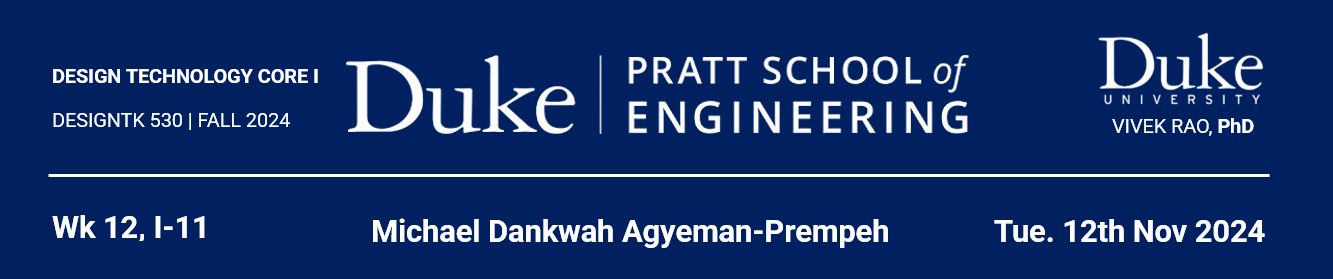
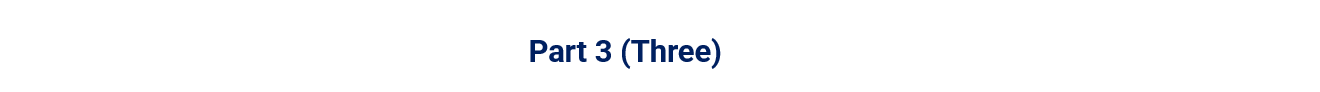

## **Problem 3.2**

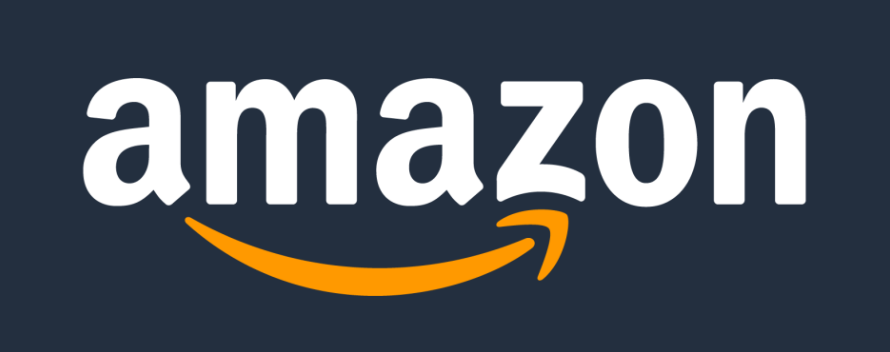

The dataset I chose was the [Amazon Sales Data](https://www.kaggle.com/code/minachatraei/data-cleaning-and-exploration-amazon-sales-data/notebook) which holds the data of 1000+ Amazon product ratings and reviews as per their details listed on their official website.

### **i. Importing Essential Libraries for Data Manipulation, Analysis and Visualization**

In [37]:
import pandas as pd
import numpy as np
import scipy as sp
import datetime as dt
from scipy import stats
from operator import attrgetter
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

### **ii. Assessing of Amazon Sales Data**

In [38]:
# Sourcing the 'Amazon Sales Dataset' to explore and perform some analysis

amazon_sales_data = pd.read_csv('C:/Users/micha/Desktop/Assign 11/dtk530_i-11/i-11/datasets/amazon.csv')

# No of rows
amazon_sales_data_rows = amazon_sales_data.shape[0]
# No of columns
amazon_sales_data_columns = amazon_sales_data.shape[1]
# Get the values
print(amazon_sales_data_rows,'\n',amazon_sales_data_columns)

amazon_sales_data.info()
# amazon_sales_data.describe()

# Showing first 30 rows of table
amazon_sales_data.head(10)

1465 
 16
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
d

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
5,B08Y1TFSP6,pTron Solero TB301 3A Type-C Data and Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹149,"₹1,000",85%,3.9,"24,871",Fast Charging & Data Sync: Solero TB301 Type-C...,"AEQ2YMXSZWEOHK2EHTNLOS56YTZQ,AGRVINWECNY7323CW...","Jayesh,Rajesh k.,Soopy,amazon customer,Aman,Sh...","R7S8ANNSDPR40,R3CLZFLHVJU26P,RFF7U7MPQFUGR,R1M...","It's pretty good,Average quality,very good and...","It's a good product.,Like,Very good item stron...",https://m.media-amazon.com/images/I/31wOPjcSxl...,https://www.amazon.in/Solero-TB301-Charging-48...
6,B08WRWPM22,"boAt Micro USB 55 Tangle-free, Sturdy Micro US...",Computers&Accessories|Accessories&Peripherals|...,₹176.63,₹499,65%,4.1,"15,188",It Ensures High Speed Transmission And Chargin...,"AG7C6DAADCTRQJG2BRS3RIKDT52Q,AFU7BOMPVJ7Q3TTA4...","Vivek kumar,Amazon Customer,SARTHAK,Chiranjeev...","R8E73K2KWJRDS,RSD0JTIIWQQL8,R64CRSTE9SLW1,R2FR...","Long durable.,good,Does not charge Lenovo m8 t...",Build quality is good and it is comes with 2 y...,https://m.media-amazon.com/images/W/WEBP_402

### **iii. Cleaning of Amazon Sales Data**

From assessing the amazon_sales_data via viewing the csv file via the MS Excel program, there are a number of things to be done like converting some `object` type columns to their appropriate type for good analysis.

Below are **three (3)** things that need to be rectified.

- **[Task 1]** I will strip of the `₹` and `,`sign from the price columns (`discounted_price` and `actual_price`) and convert to `float` for analysis purposes.
- **[Task 2]** There are **two NaN values** which need to be catered for. Since the `rating_count` column is relevant and can really affect the data interpretation, I will use the `fillna()` function to fill those rows with the mean value of the column and convert to float as well after removing the commas.
- **[Task 3]** I will strip the `%` sign from the `discount_percentage` column, convert to float and rename the column with the **%** sign for easy categorization and analysis.

**NB:** I did't touch the `product_id`, `user_d` etc. columns because they are of a unique (string of characters) nature and the other columns are relevant as well for further analysis (For example, the `review_content` can be used for `sentiment analysis` in the future).

#### **[Task 1]**

In [39]:
# Removing the '₹' currency symbol and comma, then convert to float
amazon_sales_data['discounted_price'] = amazon_sales_data['discounted_price'].astype(str).str.replace('₹', '').str.replace(',', '').astype(float)
amazon_sales_data['actual_price'] = amazon_sales_data['actual_price'].astype(str).str.replace('₹', '').str.replace(',', '').astype(float)

#### **[Task 2]**

In [40]:
# Filling the two NaN values in 'rating_count' with the mean value and convert to float while removing the commas as well
mean_rating_count = amazon_sales_data['rating_count'].str.replace(',', '').astype(float).mean()
amazon_sales_data['rating_count'] = amazon_sales_data['rating_count'].str.replace(',', '').astype(float).fillna(mean_rating_count)


#### **[Task 3]**

In [41]:
# Removing the % sign from the discount_percentage column and converting the column to float
amazon_sales_data['discount_percentage'] = amazon_sales_data['discount_percentage'].astype(str).str.rstrip('%').astype(float)

# Rename the discount_percentage column
amazon_sales_data = amazon_sales_data.rename(columns={'discount_percentage': 'discount_percentage(%)'})

Before we proceed to calculate some statistics like mean, mode and, median and visualize some key quantitative data, let's assess the `rating` as well.

In [42]:
# Assessing the 'rating' column
amazon_sales_data['rating']

sorted(amazon_sales_data['rating'].unique(), reverse=False)

['2',
 '2.3',
 '2.6',
 '2.8',
 '2.9',
 '3',
 '3.1',
 '3.2',
 '3.3',
 '3.4',
 '3.5',
 '3.6',
 '3.7',
 '3.8',
 '3.9',
 '4',
 '4.1',
 '4.2',
 '4.3',
 '4.4',
 '4.5',
 '4.6',
 '4.7',
 '4.8',
 '5',
 '|']

- **[Task 4]** The `rating` column has **a)** int and float values (eg. '4' and '4.1') and **b)** a `|` sign in one of it rows. I will replace it with the mean value of the `rating` column by using the `fillna()` function.

In [43]:
# Converting 'rating' column to numeric float where 'coerce' forces the '|' to an NaN value ('coerce' changes non number to NnN instead of getting an error
amazon_sales_data['rating'] = pd.to_numeric(amazon_sales_data['rating'], errors='coerce')

# Calculating the mean of the 'rating' column, excluding NaN values
mean_rating = amazon_sales_data['rating'].mean()

# Replacing NaN with the mean rating using fillna
amazon_sales_data['rating'] = amazon_sales_data['rating'].fillna(mean_rating)

Let's assess the cleaned data now!

In [44]:
# amazon_sales_data.describe()
amazon_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   product_id              1465 non-null   object 
 1   product_name            1465 non-null   object 
 2   category                1465 non-null   object 
 3   discounted_price        1465 non-null   float64
 4   actual_price            1465 non-null   float64
 5   discount_percentage(%)  1465 non-null   float64
 6   rating                  1465 non-null   float64
 7   rating_count            1465 non-null   float64
 8   about_product           1465 non-null   object 
 9   user_id                 1465 non-null   object 
 10  user_name               1465 non-null   object 
 11  review_id               1465 non-null   object 
 12  review_title            1465 non-null   object 
 13  review_content          1465 non-null   object 
 14  img_link                1465 non-null   

### **iv. Exploring Visualizations on the Amazon Sales Data**

#### **1. The Essential Statistics**

Now, before the visualizations, let's calculate statistics for all the quantitative data in the Amazon Sales Data and return them in a table

In [45]:
# Identifying the quantitative columns
quantitative_data_cols = ['discounted_price', 'actual_price', 'rating_count', 'discount_percentage(%)', 'rating']

print("The Qualitative Columns in the dataset are as follows:")
print(*quantitative_data_cols, sep='\n')

The Qualitative Columns in the dataset are as follows:
discounted_price
actual_price
rating_count
discount_percentage(%)
rating


In [46]:
# Creating an empty dictionary to store the statistics
asd_statistics = {}

# Loop through each quantitative column
for col in quantitative_data_cols:
    # Calculate mean
    mean = amazon_sales_data[col].mean()
    
    # Calculate median
    median = amazon_sales_data[col].median()
    
    # Calculate mode
    mode = amazon_sales_data[col].mode()[0]  # Get the first mode if multiple exist
    
    # Calculate standard deviation
    std_dev = amazon_sales_data[col].std()
    
    # Storing the statistics in the dictionary
    asd_statistics[col] = {'Mean': mean, 'Median': median, 'Mode': mode, 'Standard Deviation': std_dev}

# Creating a DataFrame from the statistics dictionary
asd_statistics_df = pd.DataFrame.from_dict(asd_statistics, orient='index')

# Displaying the table
print(asd_statistics_df.to_markdown(tablefmt="grid"))

+------------------------+-------------+----------+--------+----------------------+
|                        |        Mean |   Median |   Mode |   Standard Deviation |
+========================+=============+==========+========+======================+
| discounted_price       |  3125.31    |    799   |  199   |          6944.3      |
+------------------------+-------------+----------+--------+----------------------+
| actual_price           |  5444.99    |   1650   |  999   |         10874.8      |
+------------------------+-------------+----------+--------+----------------------+
| rating_count           | 18295.5     |   5179   | 9378   |         42724.7      |
+------------------------+-------------+----------+--------+----------------------+
| discount_percentage(%) |    47.6915  |     50   |   50   |            21.6359   |
+------------------------+-------------+----------+--------+----------------------+
| rating                 |     4.09658 |      4.1 |    4.1 |             0.2

#### **2. The Essential Visualizations**


### 1. **Distribution of Ratings vs. Number of Ratings (Reviews)**
   - **Question**: How do product ratings correlate with the number of ratings or reviews?
   - **Purpose**: This visualization will help identify if higher-rated products also tend to have more reviews, which could indicate popularity or consumer trust.

### 2. **Top 10 Average Ratings by Product Category**
   - **Question**: Which product categories have the highest average ratings?
   - **Purpose**: This visualization will help identify which product categories are rated highly by customers on average, indicating customer satisfaction or product quality across different categories.

The correlation between product ratings and review count is: 0.10139679117520263


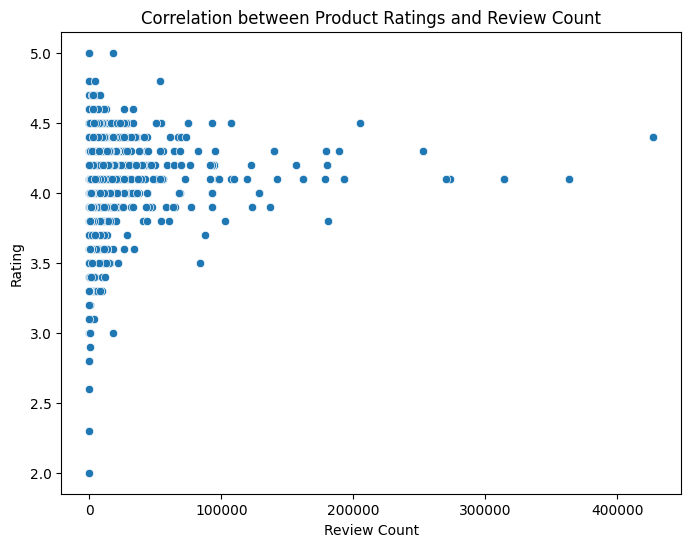

In [47]:
# Calculate the correlation between 'rating' and 'rating_count'
# Let us use 'Rating' as 'Review' for this visualization
correlation = amazon_sales_data['rating'].corr(amazon_sales_data['rating_count'])

print(f"The correlation between product ratings and review count is: {correlation}")

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
sns.scatterplot(x='rating_count', y='rating', data=amazon_sales_data)
plt.title('Correlation between Product Ratings and Review Count')
plt.xlabel('Review Count')
plt.ylabel('Rating')
plt.show()

The above scatter plot shows that product ratings generally remain stable (around 4.0-4.5) regardless of review count.

### 2. **Top 10 Average Ratings by Product Category**
   - **Question**: Which product categories have the highest average ratings?
   - **Purpose**: This visualization will help identify which product categories are rated highly by customers on average, indicating customer satisfaction or product quality across different categories.

category
Computers&Accessories|Tablets                                                                 4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters                      4.5
Electronics|Cameras&Photography|Accessories|Film                                              4.5
Computers&Accessories|Components|Memory                                                       4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                                  4.5
OfficeProducts|OfficeElectronics|Calculators|Basic                                            4.5
HomeImprovement|Electrical|CordManagement                                                     4.5
Home&Kitchen|Kitchen&HomeAppliances|Coffee,Tea&Espresso|CoffeePresses                         4.5
Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|SmallApplianceParts&Accessories    4.5
Electronics|PowerAccessories|SurgeProtectors                                                  4.5
Name: ratin

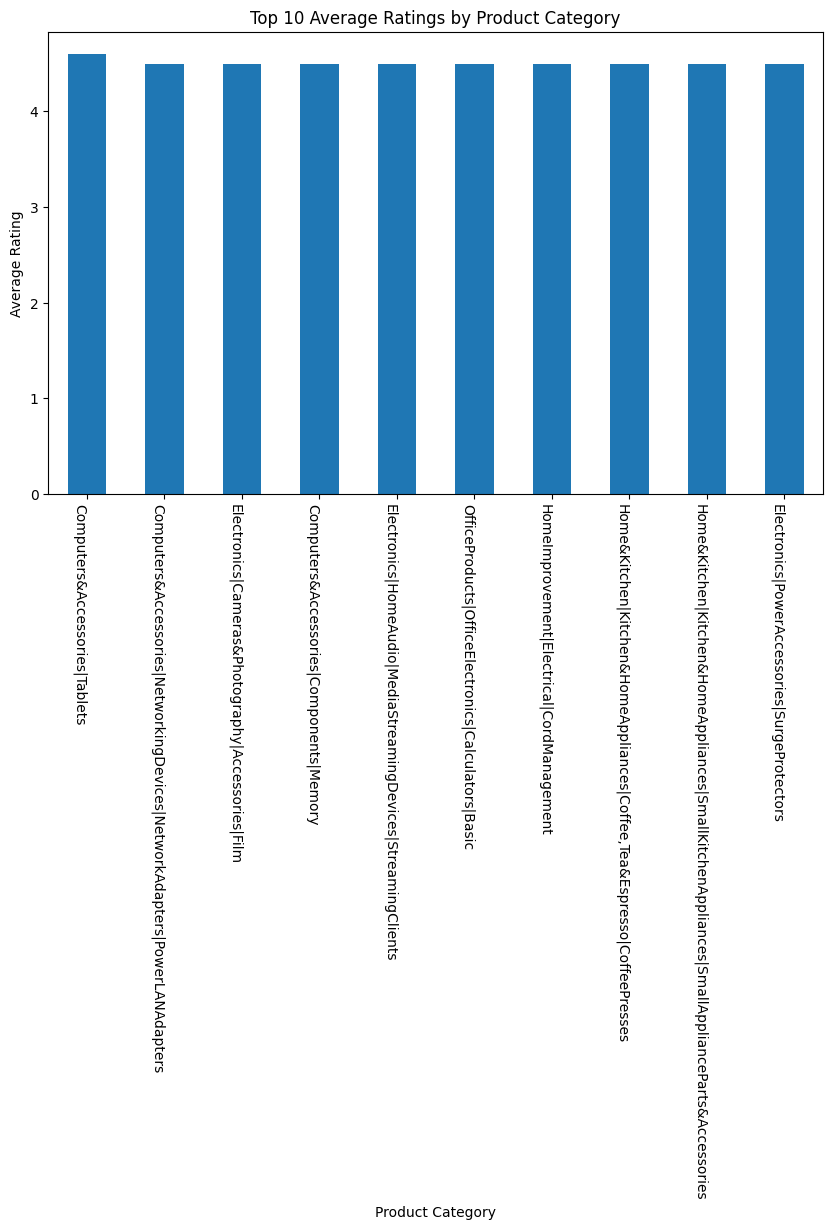

In [48]:
# Calculating the average rating for each product category
average_ratings = amazon_sales_data.groupby('category')['rating'].mean()

# Sorting the average ratings in descending order
top_10_categories = average_ratings.sort_values(ascending=False).head(10)

# Printing the top 10 categories in descending order
print(top_10_categories)

plt.figure(figsize=(10, 6))
top_10_categories.plot(kind='bar')
plt.title('Top 10 Average Ratings by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=270, ha='right')
# plt.tight_layout()
plt.show()

The above bar chart displays the top 10 product categories by average rating, all between around 4.5-4.6 stars.

# **NB:**

In [49]:
amazon_sales_data['category'].nunique()

211

I wanted to rename all category data names as acronyms due to length of initial category name. But from the above code result, we see that there are a lot of names **(211 categories)** to recode so I had to leave them as they are.